In [20]:
# read diabetes_dataset.csv file
import pandas as pd

df = pd.read_csv('diabetes_dataset.csv')
df.head()

,S.NO,AGE,SEX,FASTING_BS_T,ORAL_GLUCOSE_T,HEAMOGLOBIN_T,FASTING_BS2_T,ORAL_GLUCOSE_75G_T,BFAST_BS_T,TARGET,Height,Weight,BMI,HIP_CIRCUM,WAIST_HIP_RATIO,REV_ORAL_GLUCOSE_T
0,11,50,0,145,0,7.0,NaN,NaN,247.0,1,160.00,78,30.4688,110,1.0364,1.0
1,14,46,0,310,0,15.0,NaN,NaN,386.0,1,153.00,49,20.9321,96,0.8854,1.0
2,17,40,0,101,0,6.0,NaN,NaN,144.0,0,158.00,76,30.2436,104,1.0385,1.0
3,20,55,1,127,0,10.0,NaN,NaN,200.0,1,184.00,66,19.4943,110,1.0545,1.0
4,21,41,0,100,0,7.0,NaN,NaN,132.0,0,154.00,99,41.7440,144,0.8333,1.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.NO                921 non-null    int64  
 1   AGE                 921 non-null    int64  
 2   SEX                 921 non-null    int64  
 3   FASTING_BS_T        921 non-null    int64  
 4   ORAL_GLUCOSE_T      921 non-null    int64  
 5   HEAMOGLOBIN_T       921 non-null    float64
 6   FASTING_BS2_T       789 non-null    float64
 7   ORAL_GLUCOSE_75G_T  789 non-null    object 
 8   BFAST_BS_T          132 non-null    float64
 9   TARGET              921 non-null    int64  
 10  Height              921 non-null    object 
 11  Weight              921 non-null    object 
 12  BMI                 921 non-null    object 
 13  HIP_CIRCUM          921 non-null    object 
 14  WAIST_HIP_RATIO     921 non-null    object 
 15  REV_ORAL_GLUCOSE_T  921 non-null    float64
dtypes: float

In [22]:
# drop S.NO column as its just a serial number
df.drop(columns=['S.NO'], inplace=True)

In [23]:
df.describe()

,AGE,SEX,FASTING_BS_T,ORAL_GLUCOSE_T,HEAMOGLOBIN_T,FASTING_BS2_T,BFAST_BS_T,TARGET,REV_ORAL_GLUCOSE_T
count,921.000000,921.000000,921.000000,921.000000,921.000000,789.000000,132.000000,921.000000,921.000000
mean,48.809989,0.501629,126.230185,0.971770,7.357220,122.342205,242.212121,0.425624,0.258415
std,11.927851,0.500269,62.515574,0.507836,2.675374,60.985598,117.309471,0.494706,0.438001
min,20.000000,0.000000,62.000000,0.000000,4.000000,62.000000,70.000000,0.000000,0.000000
25%,41.000000,0.000000,89.000000,1.000000,6.000000,88.000000,147.750000,0.000000,0.000000
50%,48.000000,1.000000,105.000000,1.000000,6.000000,102.000000,224.500000,0.000000,0.000000
75%,56.000000,1.000000,136.000000,1.000000,8.000000,130.000000,290.500000,1.000000,1.000000
max,83.000000,1.000000,702.000000,2.000000,21.000000,702.000000,607.000000,1.000000,1.000000


In [24]:
non_numeric_values = set()
for column in df.select_dtypes(include='object').columns:
    numeric_values = df[column].apply(pd.to_numeric, errors='coerce')
    non_numeric_mask = numeric_values.isna()
    non_numeric_values.update(set(df[column].loc[non_numeric_mask]))

print("Unique non-numeric values across object-type columns:", list(non_numeric_values))

Unique non-numeric values across object-type columns: ['#NULL!', nan]


In [25]:
import numpy as np
# iterate over each column and replace '#NULL!' as NaN
for col in df.columns:
    df[col] = df[col].replace('#NULL!', np.nan)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGE                 921 non-null    int64  
 1   SEX                 921 non-null    int64  
 2   FASTING_BS_T        921 non-null    int64  
 3   ORAL_GLUCOSE_T      921 non-null    int64  
 4   HEAMOGLOBIN_T       921 non-null    float64
 5   FASTING_BS2_T       789 non-null    float64
 6   ORAL_GLUCOSE_75G_T  683 non-null    object 
 7   BFAST_BS_T          132 non-null    float64
 8   TARGET              921 non-null    int64  
 9   Height              920 non-null    object 
 10  Weight              920 non-null    object 
 11  BMI                 920 non-null    object 
 12  HIP_CIRCUM          879 non-null    object 
 13  WAIST_HIP_RATIO     879 non-null    object 
 14  REV_ORAL_GLUCOSE_T  921 non-null    float64
dtypes: float64(4), int64(5), object(6)
memory usage: 108.1+ K

In [27]:
# print all columns which has null values
for col in df.columns:
    if df[col].isnull().sum() >0:
        print(col, ' = ', df[col].isnull().sum())

FASTING_BS2_T  =  132
ORAL_GLUCOSE_75G_T  =  238
BFAST_BS_T  =  789
Height  =  1
Weight  =  1
BMI  =  1
HIP_CIRCUM  =  42
WAIST_HIP_RATIO  =  42


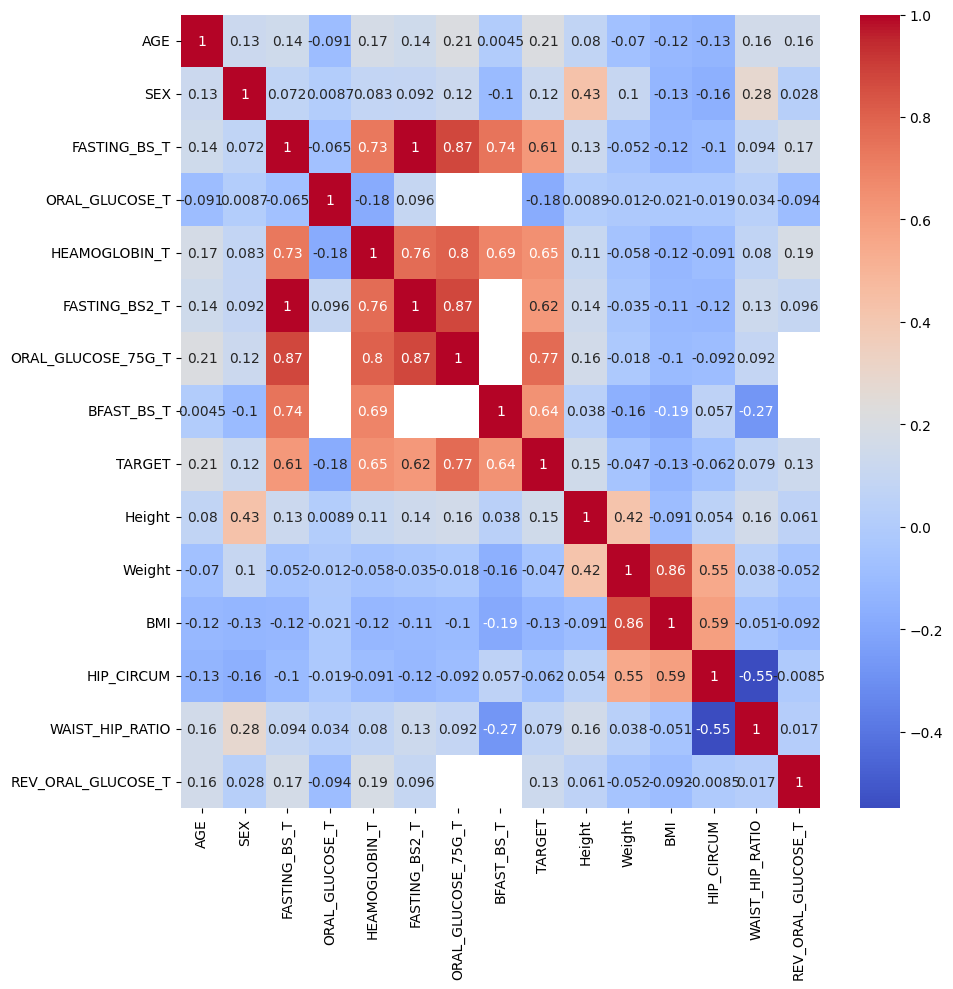

In [28]:
# plot the correlation matrix heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.tight_layout()

In [29]:
# drop the repeating columns FASTING_BS2_TEST as it has null and same values as FASTING_BS_TEST
df.drop(columns=['FASTING_BS2_T'], inplace=True)

In [30]:
# print row with Height as null
df[df['Height'].isnull()]

,AGE,SEX,FASTING_BS_T,ORAL_GLUCOSE_T,HEAMOGLOBIN_T,ORAL_GLUCOSE_75G_T,BFAST_BS_T,TARGET,Height,Weight,BMI,HIP_CIRCUM,WAIST_HIP_RATIO,REV_ORAL_GLUCOSE_T
774,28,1,82,1,8.0,90,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0


In [31]:
# drop the single row which has all Heigh Weight and BMI null values
df.dropna(subset=['Height'], inplace=True)

# convert object to numeric types
df['Height'] = df['Height'].astype('float64')
df['Weight'] = df['Weight'].astype('int64')
df['BMI'] = df['BMI'].astype('float64')


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 0 to 920
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGE                 920 non-null    int64  
 1   SEX                 920 non-null    int64  
 2   FASTING_BS_T        920 non-null    int64  
 3   ORAL_GLUCOSE_T      920 non-null    int64  
 4   HEAMOGLOBIN_T       920 non-null    float64
 5   ORAL_GLUCOSE_75G_T  682 non-null    object 
 6   BFAST_BS_T          132 non-null    float64
 7   TARGET              920 non-null    int64  
 8   Height              920 non-null    float64
 9   Weight              920 non-null    int64  
 10  BMI                 920 non-null    float64
 11  HIP_CIRCUM          879 non-null    object 
 12  WAIST_HIP_RATIO     879 non-null    object 
 13  REV_ORAL_GLUCOSE_T  920 non-null    float64
dtypes: float64(5), int64(6), object(3)
memory usage: 107.8+ KB


In [33]:
# print all columsn which has null values
for col in df.columns:
    if df[col].isnull().sum() >0:
        print(col, ' = ', df[col].isnull().sum())

ORAL_GLUCOSE_75G_T  =  238
BFAST_BS_T  =  788
HIP_CIRCUM  =  41
WAIST_HIP_RATIO  =  41


In [34]:
# iterate through each row which has WAIST_HIP_RATIO as null and use BMI to find a similar row and copy the values

for index, row in df[df['WAIST_HIP_RATIO'].isnull()].iterrows():
    bmi = row['BMI']
    WAIST_HIP_RATIO = row['WAIST_HIP_RATIO']
    bmi_integer = int(bmi)

    # find the row with same BMI integer value
    df1 = df[df['BMI'].astype('int64') == bmi_integer]

    df.at[index, 'WAIST_HIP_RATIO'] = df1.at[df1.index[0], 'WAIST_HIP_RATIO']
    df.at[index, 'HIP_CIRCUM'] = df1.at[df1.index[0], 'HIP_CIRCUM']    

print('null values after transformation = ',df['HIP_CIRCUM'].isnull().sum())

df['HIP_CIRCUM'].fillna(0, inplace=True)
df['WAIST_HIP_RATIO'].fillna(0, inplace=True)

# convert columns to numeric types
df['WAIST_HIP_RATIO'] = df['WAIST_HIP_RATIO'].astype('float64')
df['HIP_CIRCUM'] = df['HIP_CIRCUM'].astype('float64')

null values after transformation =  1


In [35]:
# info of FASTING_BS_TEST column and ORAL_GLUCOSE_75G_TEST column    
df[['BFAST_BS_T', 'ORAL_GLUCOSE_75G_T']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 0 to 920
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BFAST_BS_T          132 non-null    float64
 1   ORAL_GLUCOSE_75G_T  682 non-null    object 
dtypes: float64(1), object(1)
memory usage: 53.9+ KB


In [36]:
# fill the remaining null values with mean
df['BFAST_BS_T'].fillna(df['BFAST_BS_T'].mean(), inplace=True)
df['ORAL_GLUCOSE_75G_T'].fillna(0, inplace=True)
df['ORAL_GLUCOSE_75G_T'] = df['ORAL_GLUCOSE_75G_T'].astype('int64')
df['ORAL_GLUCOSE_75G_T'].replace(0, df['ORAL_GLUCOSE_75G_T'].mean(), inplace=True)

In [37]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 0 to 920
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AGE                 920 non-null    int64  
 1   SEX                 920 non-null    int64  
 2   FASTING_BS_T        920 non-null    int64  
 3   ORAL_GLUCOSE_T      920 non-null    int64  
 4   HEAMOGLOBIN_T       920 non-null    float64
 5   ORAL_GLUCOSE_75G_T  920 non-null    float64
 6   BFAST_BS_T          920 non-null    float64
 7   TARGET              920 non-null    int64  
 8   Height              920 non-null    float64
 9   Weight              920 non-null    int64  
 10  BMI                 920 non-null    float64
 11  HIP_CIRCUM          920 non-null    float64
 12  WAIST_HIP_RATIO     920 non-null    float64
 13  REV_ORAL_GLUCOSE_T  920 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 140.1 KB


In [38]:
# move TARGET column to the end
target = df.pop('TARGET')
df['TARGET'] = target

# save the cleaned data to a new csv file
df.to_csv('diabetes_dataset_cleaned.csv', index=False)